<a href="https://colab.research.google.com/github/MadeehaTassadaq/MadeehaTassadaq/blob/main/brain_tumor_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**About the Author**\
👋I'm Dr. Madeeha Tassadaq, a dedicated gynecologist with a passion for leveraging data science to enhance healthcare outcomes. My journey in medicine has equipped me with a profound understanding of women's health issues, and now I'm eager to explore the intersection of healthcare and data. 👀I'm on an exciting journey to dive deep into the world of data science. With a thirst for knowledge and a commitment to continuous learning, I'm exploring various tools, techniques, and methodologies to harness the power of data for insights and innovation in healthcare. 🌱 I’m currently learning Healthcare Analytics,Predictive Modeling. 💞️ I’m looking to collaborate on Research: Collaborating with interdisciplinary teams to conduct meaningful research at the intersection of medicine and data science

In [1]:
# import the dataset from kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [2]:
#!/bin/bash
!kaggle datasets download ahmedhamada0/brain-tumor-detection

Dataset URL: https://www.kaggle.com/datasets/ahmedhamada0/brain-tumor-detection
License(s): copyright-authors
 99% 83.0M/84.0M [00:03<00:00, 31.3MB/s]
100% 84.0M/84.0M [00:03<00:00, 23.9MB/s]


In [3]:
# extract zip file
import zipfile
# Unzip the file
zip_ref =  zipfile.ZipFile('/content/brain-tumor-detection.zip', 'r')
zip_ref.extractall('/content/')
zip_ref.close()

## **About the data**

The dataset contains 3 folders: yes, no and pred which contains 3060 Brain MRI Images.\
**Folder	Description**\
Yes:	The folder yes contains 1500 Brain MRI Images that are tumorous\
No:	The folder no contains 1500 Brain MRI Images that are non-tumorous\
Pred: contains 60 images

In [4]:
import os
import cv2
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
!pip install scikit-learn
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import normalize

In [5]:
image_directory="/content/datasets/"
no_tumor_images=os.listdir(image_directory + "no")
yes_tumor_images=os.listdir(image_directory + "yes")

In [6]:
dataset=[]
label=[]
for i , image_name in enumerate(no_tumor_images):
  if(image_name.split(".")[1]=="jpg"):
    image=cv2.imread(image_directory + "no/" + image_name)
    image=Image.fromarray(image,"RGB")
    image=image.resize((224,224))
    dataset.append(np.array(image))
    label.append(0)

In [7]:
for i , image_name in enumerate(yes_tumor_images):
  if(image_name.split(".")[1]=="jpg"):
    image=cv2.imread(image_directory + "yes/" + image_name)
    image=Image.fromarray(image,"RGB")
    image=image.resize((224,224))
    dataset.append(np.array(image))
    label.append(1)

In [ ]:
print(len(dataset))

3000


In [ ]:
print(len(label))

3000


In [8]:
dataset=np.array(dataset)
label=np.array(label)

In [9]:
x_train,x_test,y_train,y_test=train_test_split(dataset,label,test_size=0.2,random_state=42)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2400, 224, 224, 3)
(600, 224, 224, 3)
(2400,)
(600,)


In [10]:
x_train=normalize(x_train)
x_test=normalize(x_test)

In [11]:
# model building using VGG19
model = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
for layer in model.layers:
  layer.trainable=False
x=Flatten()(model.output)
x=Dense(4096,activation='relu')(x) # 1st hidden layer
dropout=Dropout(0.2)(x)
x=Dense(4096,activation='relu')(dropout) # 2nd hidden layer
x=Dense(1,activation='sigmoid')(x) # output layer
model=Model(inputs=model.input,outputs=x)
model.summary()

80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv4 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv4 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv4 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 139,574,337 (532.43 MB)

 Trainable params: 119,549,953 (456.05 MB)

 Non-trainable params: 20,024,384 (76.39 MB)

In [12]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

**Model training**

In [14]:
# train the model
history=model.fit(x_train,y_train,epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 19s 249ms/step - accuracy: 0.7858 - loss: 0.4453 - val_accuracy: 0.7800 - val_loss: 0.4708
Epoch 2/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 17s 211ms/step - accuracy: 0.8294 - loss: 0.3626 - val_accuracy: 0.8033 - val_loss: 0.4800
Epoch 3/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 21s 219ms/step - accuracy: 0.8249 - loss: 0.3549 - val_accuracy: 0.8167 - val_loss: 0.3780
Epoch 4/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 21s 222ms/step - accuracy: 0.8831 - loss: 0.2590 - val_accuracy: 0.8350 - val_loss: 0.3316
Epoch 5/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 16s 217ms/step - accuracy: 0.8848 - loss: 0.2326 - val_accuracy: 0.8433 - val_loss: 0.2972
Epoch 6/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 20s 212ms/step - accuracy: 0.9065 - loss: 0.1957 - val_accuracy: 0.7950 - val_loss: 0.4928
Epoch 7/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 21s 216ms/step - accuracy: 0.8913 - loss: 0.2087 - val_accuracy: 0.8850 - val_loss: 0.2434
Epoch 8/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 21s 220ms/step - accuracy: 0.9220 - loss: 0.1623 - val_accu

**Plotting the Accuracy and Losses**

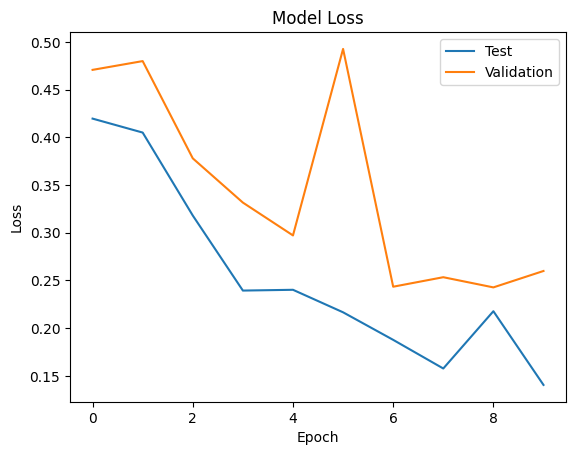

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Test', 'Validation'], loc='upper right')
plt.show()

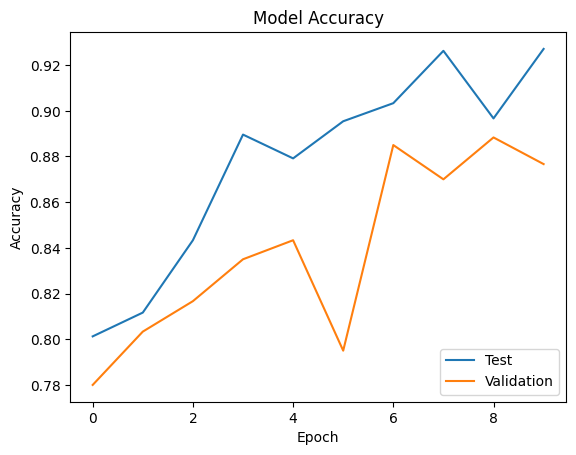

In [16]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Test', 'Validation'], loc='lower right')

**Testing the model**

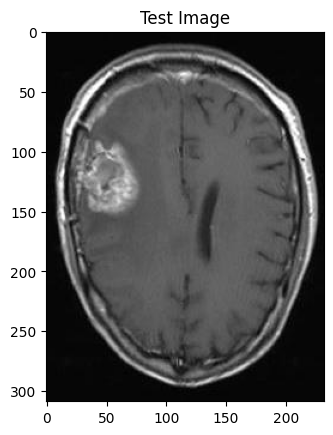

In [17]:
test_image=img=cv2.imread("/content/datasets/TEST/y701.jpg")
plt.imshow(test_image)
plt.title("Test Image")
plt.show()

In [18]:
# preprocess the test image before passing to model
test_image=Image.fromarray(test_image)
test_image=test_image.resize((224,224))
test_image=np.array(test_image)
test_image=np.expand_dims(test_image,axis=0)
test_image=normalize(test_image)

In [19]:
prediction=model.predict(test_image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


In [20]:
if prediction[0][0] > 0.5:
    print("Prediction: Tumor Detected")
else:
    print("Prediction: No Tumor")
predicted_labels = (prediction > 0.5).astype(int)
predicted_labels

Prediction: Tumor Detected


array([[1]])

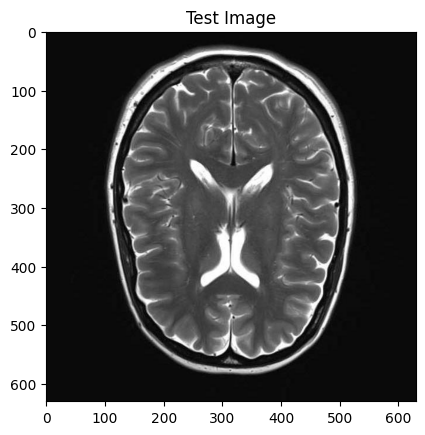

In [21]:
test_image_2=img=cv2.imread("/content/datasets/no/No12.jpg")
plt.imshow(test_image_2)
plt.title("Test Image")
plt.show()

In [22]:
# preprocess the test image before passing to model
test_image_2=Image.fromarray(test_image_2)
test_image_2=test_image_2.resize((224,224))
test_image_2=np.array(test_image_2)
test_image_2=np.expand_dims(test_image_2,axis=0)
test_image_2=normalize(test_image_2)

In [23]:
prediction2=model.predict(test_image_2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


In [24]:
if prediction[0][0] > 0.5:
    print("Prediction: Tumor Detected")
else:
    print("Prediction: No Tumor")
predicted_labels = (prediction2 > 0.5).astype(int)
predicted_labels

Prediction: Tumor Detected


array([[1]])

In [ ]:
!pip install gradio
import gradio as gr


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.2/57.2 MB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.2/320.2 kB 28.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 106.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.8/63.8 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.2/168.2 kB 17.4 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2


In [ ]:
#title Provide a title for your app:
heading_title = "Brain Tumor Classification App"
desc = "Brain tumor app. Let's learn!"
long_desc = "Select an image or upload one to predict if brain tumor is present or not."

In [ ]:
def recognize_image(image):
    # Resize the image to the expected dimensions
    img = Image.fromarray(image).resize((224, 224))
    # Convert the image to a NumPy array
    x = np.array(img)
    # Reshape the image to match the model input
    x = x.reshape(1, 224, 224, 3)
    # Normalize the image
    x = normalize(x)

    prediction=model.predict(x)[0][0]
      # Map the prediction to a label
    if prediction > 0.5:
        return "Tumor"
    else:
        return "No Tumor"


In [ ]:

# Update the import for components
image = gr.Image()
label = gr.Label()

# Create the interface with the updated component imports
iface = gr.Interface(
    fn=recognize_image,
    inputs=image,
    outputs=label,
    title=heading_title,
    description=desc,
    article=long_desc,
)

iface.launch(share=True, debug=True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://dc49ba9c059b5227f8.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://dc49ba9c059b5227f8.gradio.live
